<H1>Release Date and ROI </H1>

*Import appropriate packages.*

In [44]:
import pandas as pd
import requests as rq
import matplotlib.pyplot as plt
import tmdbsimple as tmdb
from config import tmdb_key

%matplotlib inline

In [45]:
tmdb.API_KEY = tmdb_key

*Import the data.*

In [46]:
df_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [47]:
df_dollars = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

*Convert strings to appropriate datatypes. The dates and monetary columns were all formatted as strings upon import.*

In [6]:
df_dollars['release_date']=pd.to_datetime(df_dollars['release_date'],format='%b %d, %Y')

In [37]:
def dollar_to_number(value):
    rev = str(value)
    rev1 = rev.replace('$','')
    rev2 = rev1.replace(',','')
    rev3 = float(rev2)
    return rev3

df_dollars['production_budget'] = df_dollars['production_budget'].map(lambda x: dollar_to_number(x))
df_dollars['domestic_gross'] = df_dollars['domestic_gross'].map(lambda x: dollar_to_number(x))
df_dollars['worldwide_gross'] = df_dollars['worldwide_gross'].map(lambda x: dollar_to_number(x))
df_dollars['domestic_return'] = df_dollars['domestic_gross']/df_dollars['production_budget']
df_dollars['worldwide_return'] = df_dollars['worldwide_gross']/df_dollars['production_budget']

In [38]:
df_dollars.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,domestic_return,worldwide_return
movie,,,,,,,
Avatar,1,2009-12-18,425000000.0,760507625.0,2.776345e+09,1.789430,6.532577
Pirates of the Caribbean: On Stranger Tides,2,2011-05-20,410600000.0,241063875.0,1.045664e+09,0.587101,2.546673
Dark Phoenix,3,2019-06-07,350000000.0,42762350.0,1.497624e+08,0.122178,0.427892
Avengers: Age of Ultron,4,2015-05-01,330600000.0,459005868.0,1.403014e+09,1.388403,4.243841
Star Wars Ep. VIII: The Last Jedi,5,2017-12-15,317000000.0,620181382.0,1.316722e+09,1.956408,4.153696


*Now that the tables are cleaned, I'll create a join on the 'title' and 'movie' columns. First I set them both as the index, then execute the join.*

In [48]:
joined_df = df_mov.join(df_dollars,how='inner',lsuffix = 'dollars')
joined_df['release_year'] = joined_df['release_date'].dt.year.astype(int)
recent_movies_df = joined_df[joined_df['release_year'] > 1999].copy()
recent_movies_df['release_date'] = pd.to_datetime(recent_movies_df['release_date'])
recent_movies_df['release_day'] = recent_movies_df['release_date'].dt.day_name()
recent_movies_df['release_month'] = recent_movies_df['release_date'].dt.month_name()
df_genres = joined_df.copy().drop(['iddollars','Unnamed: 0','original_language','popularity','release_datedollars','vote_average','vote_count','id'],axis=1)
df_genres.to_csv('genres_df.csv',index=True)
df_genres.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [49]:
by_month = recent_movies_df.groupby('release_month').sum()
by_month['domestic_return'] = by_month['domestic-gross']/by_month['production-budget']
by_month['worldwide_return'] = by_month['worldwide-gross']/by_month['production-budget']
by_month.drop(['id','idgross','Unnamed: 0','popularity'],axis=1)

KeyError: 'domestic-gross'

<AxesSubplot:ylabel='release_month'>

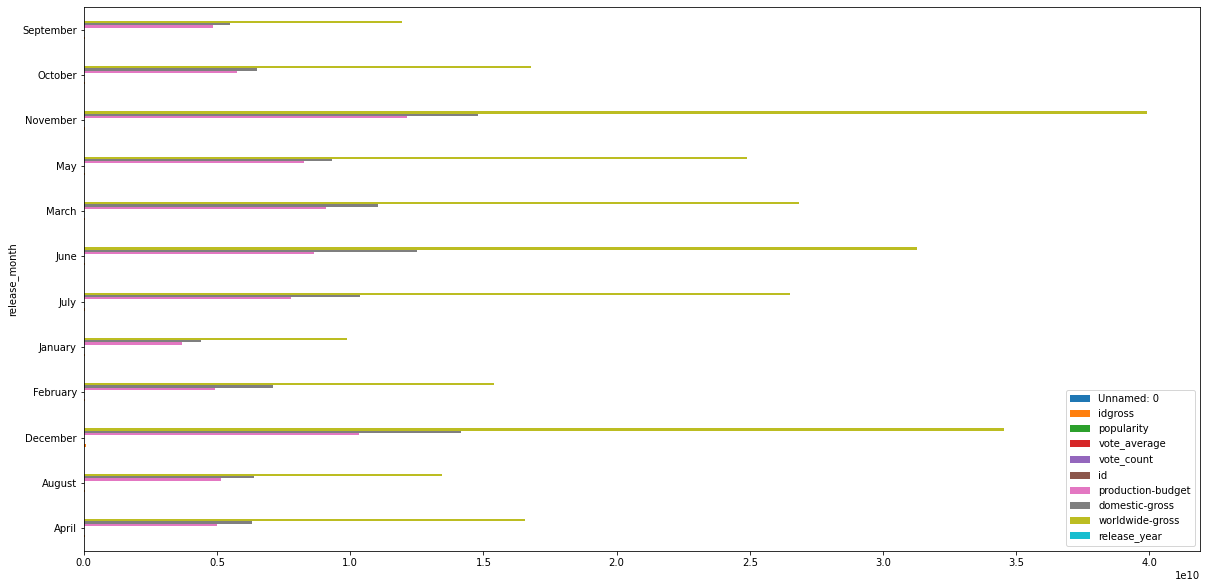

In [9]:
recent_movies_df.groupby('release_month').sum().plot(figsize=(20,10),kind='barh')

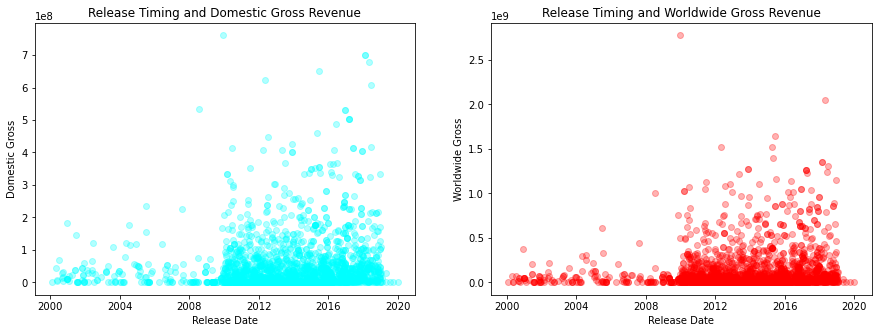

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.scatter(
    x=recent_movies_df["release_date"],
    y=recent_movies_df["domestic-gross"],
    alpha=0.3,
    color='cyan'
)

ax1.set_xlabel("Release Date")
ax1.set_ylabel("Domestic Gross")
ax1.set_title("Release Timing and Domestic Gross Revenue")

ax2.scatter(
    x=recent_movies_df["release_date"],
    y=recent_movies_df["worldwide-gross"],
    alpha=0.3,
    color='red'
)

ax2.set_xlabel("Release Date")
ax2.set_ylabel("Worldwide Gross")
ax2.set_title("Release Timing and Worldwide Gross Revenue");

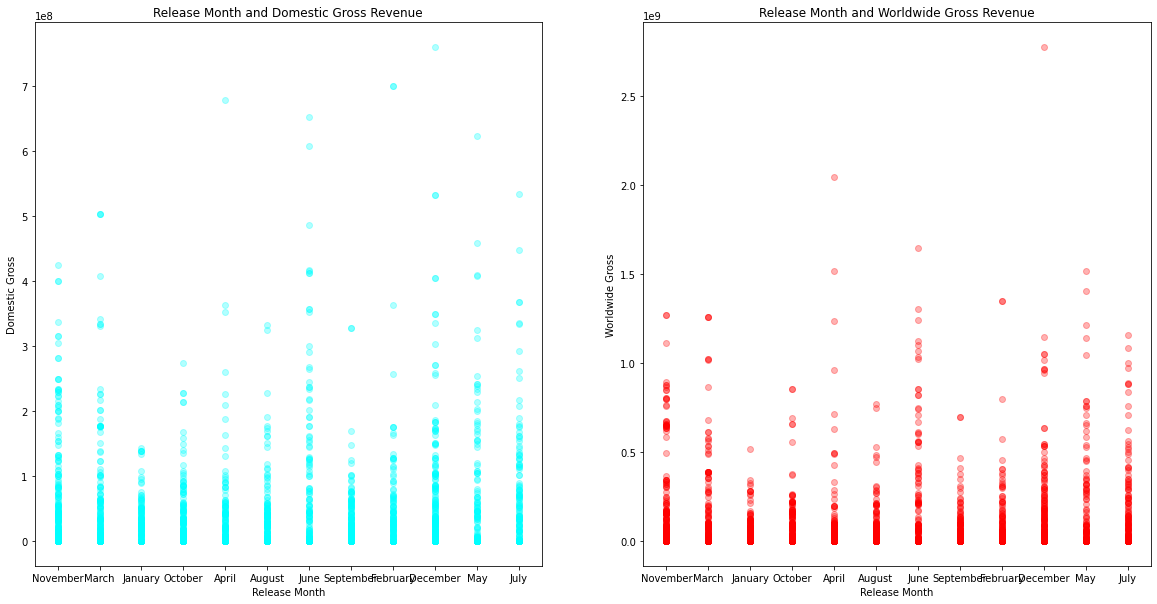

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
ax1.scatter(
    x=recent_movies_df["release_month"],
    y=recent_movies_df["domestic-gross"],
    alpha=0.3,
    color='cyan'
)

ax1.set_xlabel("Release Month")
ax1.set_ylabel("Domestic Gross")
ax1.set_title("Release Month and Domestic Gross Revenue")

ax2.scatter(
    x=recent_movies_df["release_month"],
    y=recent_movies_df["worldwide-gross"],
    alpha=0.3,
    color='red'
)

ax2.set_xlabel("Release Month")
ax2.set_ylabel("Worldwide Gross")
ax2.set_title("Release Month and Worldwide Gross Revenue");

KeyError: 'domestic-gross'

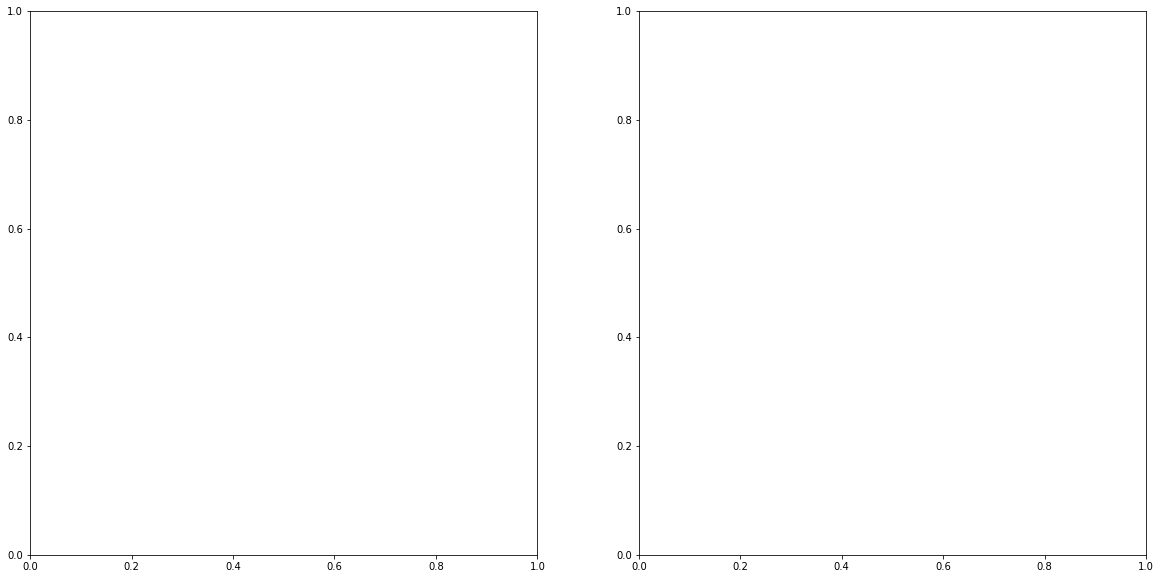

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
ax1.scatter(
    x=recent_movies_df["release_day"],
    y=recent_movies_df["domestic-gross"],
    alpha=0.3,
    color='cyan'
)

ax1.set_xlabel("Release Day")
ax1.set_ylabel("Domestic Gross")
ax1.set_title("Release Day and Domestic Gross Revenue")

ax2.bar(
    x=recent_movies_df["release_day"],
    height=recent_movies_df["release_day"],
    alpha=0.3,
    color='red'
)

ax2.set_xlabel("Release Day")
ax2.set_ylabel("Worldwide Gross")
ax2.set_title("Release Day and Worldwide Gross Revenue");

*Below this line is my scratch work.
Add release_day, release_month column df_movies*

In [13]:
df_movies.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [14]:
df_movies.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [16]:
df_movies.groupby('release_day').sum()

KeyError: 'release_day'

In [80]:
response = rq.get(f'https://api.themoviedb.org/3/movie/550?api_key={tmdb_key}')

In [81]:
response.status_code

200

In [82]:
response.headers

{'Content-Type': 'application/json;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Date': 'Thu, 03 Jun 2021 16:54:06 GMT', 'Server': 'openresty', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'GET, HEAD, POST, PUT, DELETE, OPTIONS', 'Access-Control-Expose-Headers': 'ETag, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Reset, Retry-After, Content-Length, Content-Range', 'Cache-Control': 'public, max-age=28800', 'X-Memc': 'HIT', 'X-Memc-Key': 'ade4da0c2a4d430121774a5494398f64a3949dda', 'X-Memc-Age': '15487', 'X-Memc-Expires': '52', 'ETag': 'W/"4e113fee363aa97992872d9ba4f0a231"', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'X-Cache': 'Hit from cloudfront', 'Via': '1.1 4cc685c660795f2a3ffdaa4847751a1c.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'ATL56-C2', 'X-Amz-Cf-Id': '-0_8HXl4ZBgOiYyu4qXjTlXSIu5Lc-wNXADfFutQn2KV9EpqpvNd2Q==', 'Age': '7490'}

In [83]:
response.json()

{'adult': False,
 'backdrop_path': '/rr7E0NoGKxvbkb89eR1GwfoYjpA.jpg',
 'belongs_to_collection': None,
 'budget': 63000000,
 'genres': [{'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.foxmovies.com/movies/fight-club',
 'id': 550,
 'imdb_id': 'tt0137523',
 'original_language': 'en',
 'original_title': 'Fight Club',
 'overview': 'A ticking-time-bomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy. Their concept catches on, with underground "fight clubs" forming in every town, until an eccentric gets in the way and ignites an out-of-control spiral toward oblivion.',
 'popularity': 41.861,
 'poster_path': '/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg',
 'production_companies': [{'id': 508,
   'logo_path': '/7PzJdsLGlR7oW4J0J5Xcd0pHGRg.png',
   'name': 'Regency Enterprises',
   'origin_country': 'US'},
  {'id': 711,
   'logo_path': '/tEiIH5QesdheJmDAqQwvtN60727.png',
   'name': 'Fox 2000 Pictures',
   'origin_country': 'US'},
  {'id': 205